In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results_path = "/home/akamath/Documents/toskipornot/reports"

model_list = ["UNet++", "AttentionUNet", "UNet", "VNet", "NoSkipUNet", "NoSkipVNet"]
anatomy_list = ["BUSI", "GLaS", "Heart", "Spleen"]
variant_list = ["lower", "low", "in-domain", "high", "higher"]

For texture variant: lower mean scores;
            UNet++ AttentionUNet        UNet        VNet  NoSkipUNet  \
BUSI    129.776768     71.558036   83.099576   44.426087   61.463133   
GLaS    110.545612     98.142169  110.006598  104.722821  116.704323   
Heart   359.253966    152.318538  168.596093    9.535443    7.832587   
Spleen  361.659938    172.397837  262.675155  349.910796   77.660328   

        NoSkipVNet  
BUSI     27.557937  
GLaS    100.449656  
Heart     5.884235  
Spleen  148.661466  
For texture variant: lower std scores;
           UNet++ AttentionUNet        UNet       VNet NoSkipUNet  NoSkipVNet
BUSI    35.751582      49.59523   74.183871   63.05113  63.896494   42.932066
GLaS    60.973875     65.857406   61.938701  66.373859   58.78925   65.657443
Heart   30.377613     29.519705  171.163629  19.181887   6.914801    8.067128
Spleen   9.633552     48.895545  116.926506  55.976541  92.718269  149.510096
For texture variant: low mean scores;
            UNet++ Attentio

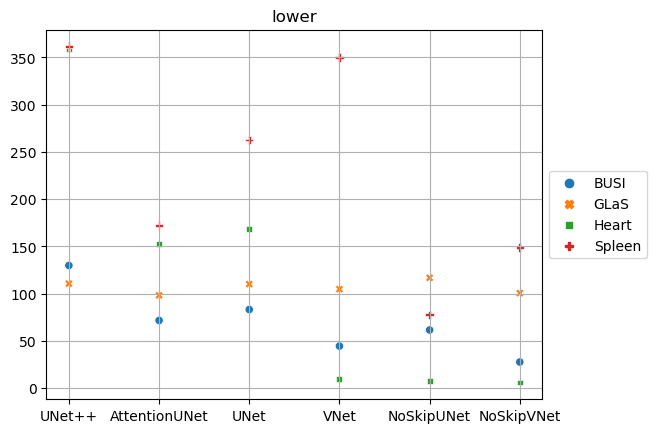

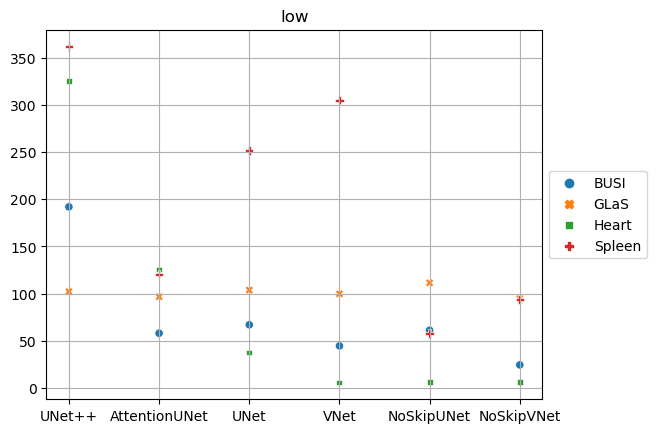

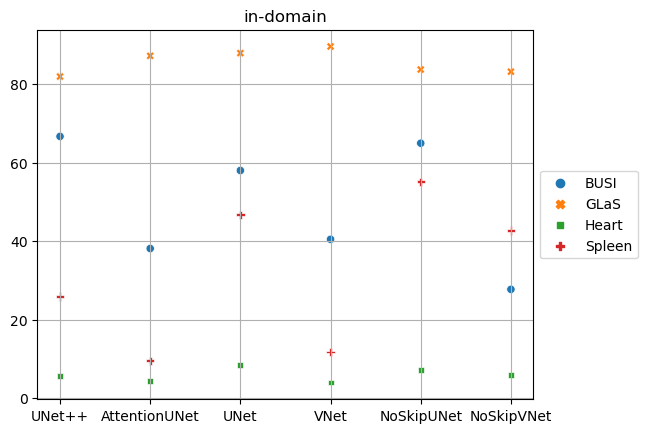

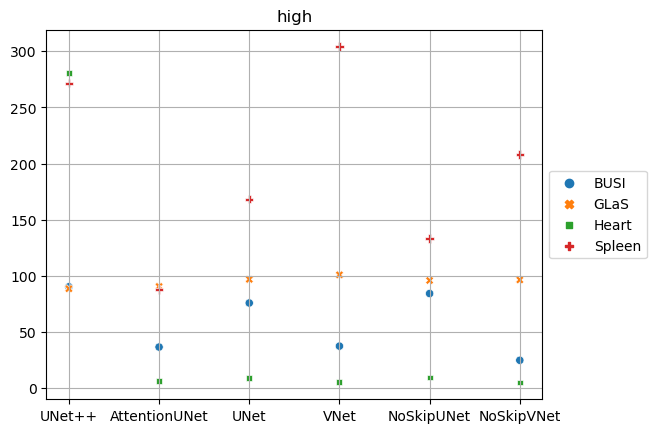

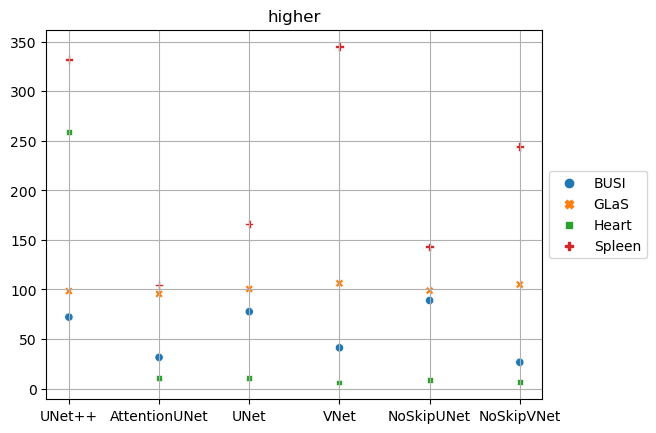

<Figure size 640x480 with 0 Axes>

In [3]:
hd_mean_data = {}
hd_std_data = {}

for texture_variant in ["lower", "low", "in-domain", "high", "higher"]:
    hd_mean = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    hd_sd = pd.DataFrame(columns=model_list,
                    index=anatomy_list)

    for anatomy in anatomy_list:
        for model_name in model_list:
            result_seed_1 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_1.csv")
            result_seed_2 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_2.csv")
            result_seed_3 = os.path.join(results_path, anatomy + "-results", anatomy + "_stats_" + model_name + "_" + texture_variant + "_256_3.csv")

            seed_1_data = pd.read_csv(result_seed_1)
            seed_1_data = seed_1_data.loc[seed_1_data['Set'] == "test"]

            seed_2_data = pd.read_csv(result_seed_2)
            seed_2_data = seed_2_data.loc[seed_2_data['Set'] == "test"]

            seed_3_data = pd.read_csv(result_seed_3)
            seed_3_data = seed_3_data.loc[seed_3_data['Set'] == "test"]

            hd_scores = np.hstack((seed_1_data["HD"].to_numpy(), seed_2_data["HD"].to_numpy(), seed_3_data["HD"].to_numpy()))
            hd_scores[~np.isfinite(hd_scores)] = np.sqrt(2) * 256

            #print("For anatomy: " + anatomy + " and model: " + model_name + " and texture: " + texture_variant + ", HD mean: " + str(np.nanmean(hd_scores)) + ", std: " + str(np.nanstd(hd_scores)))

            hd_mean[model_name][anatomy] = np.mean(hd_scores)
            hd_sd[model_name][anatomy] = np.std(hd_scores)
    
    hd_mean_data[texture_variant] = hd_mean
    hd_std_data[texture_variant] = hd_sd
    
    print("For texture variant: " + str(texture_variant) + " mean scores;")
    print(hd_mean)
    print("For texture variant: " + str(texture_variant) + " std scores;")
    print(hd_sd)
    ax = sns.scatterplot(data=hd_mean.T)
    ax.set_title(str(texture_variant))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.figure()


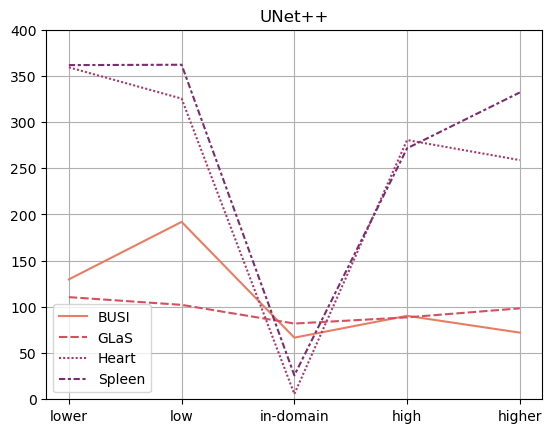

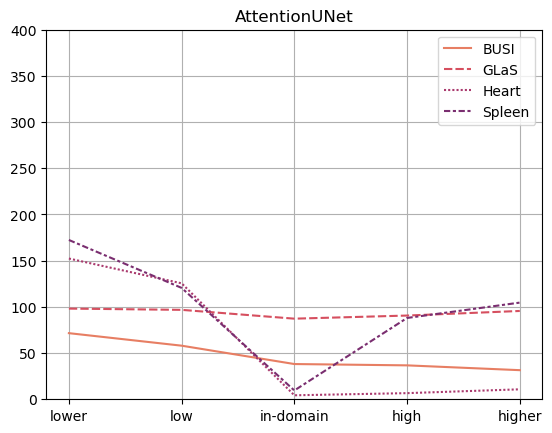

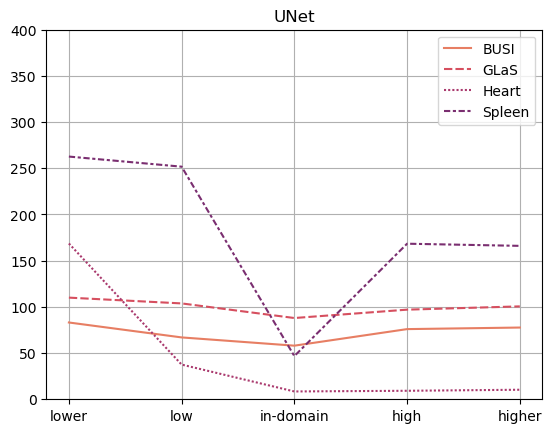

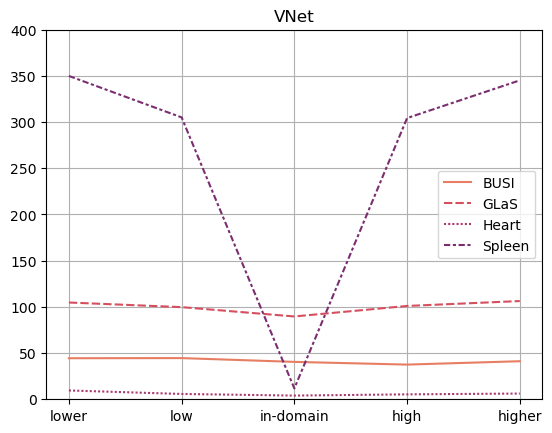

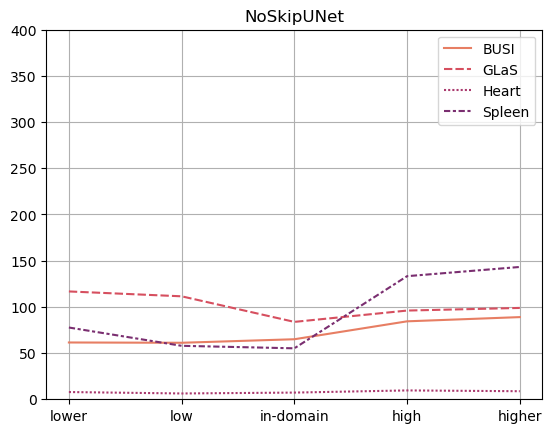

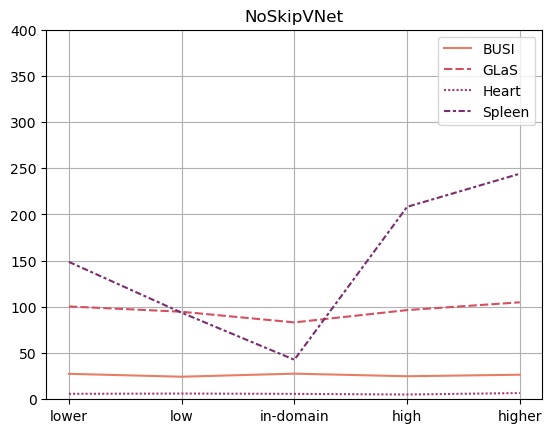

In [4]:
for model_type in model_list:
    results_by_image = {}
    for image_type in anatomy_list:
        mean_line = []
        for variant in variant_list:
            mean_line.append(hd_mean_data[variant][model_type][image_type])

        results_by_image[image_type] = mean_line

    plt.figure()
    df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
    sns.lineplot(data=df.T, palette='flare')
    plt.title(model_type)
    plt.grid(True)
    plt.ylim([0, 400])

/tmp/ipykernel_4183664/4116588975.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183664/4116588975.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183664/4116588975.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183664/4116588975.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183664/4116588975.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
/tmp/ipykernel_4183664/4116588975.py:18: UserWarni

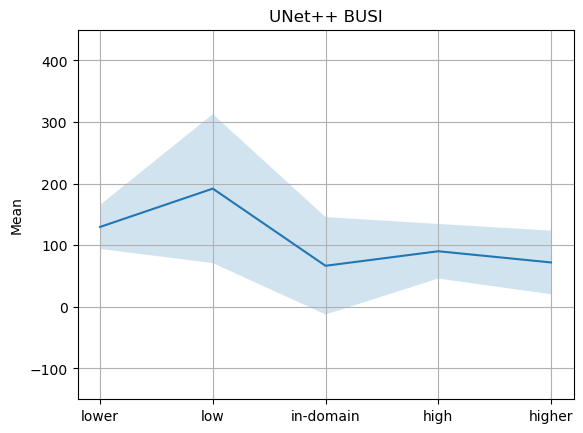

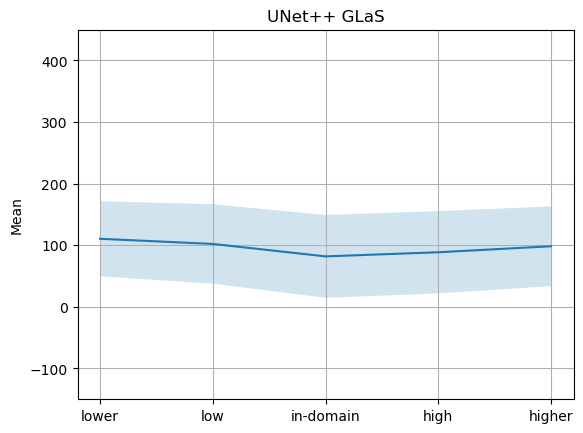

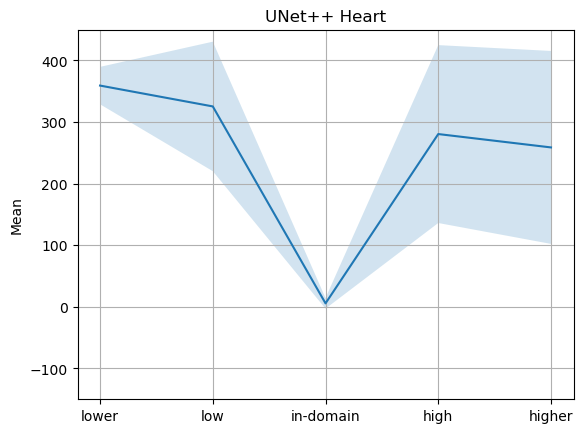

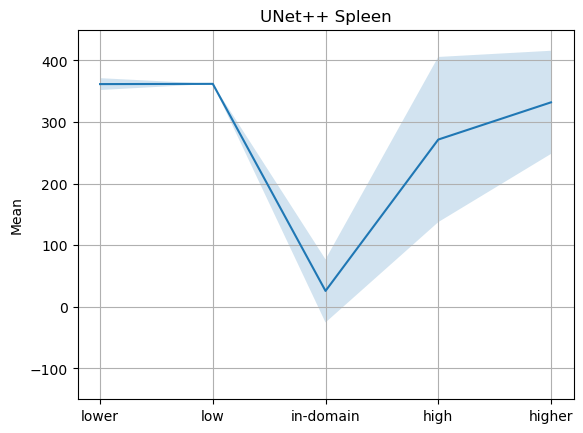

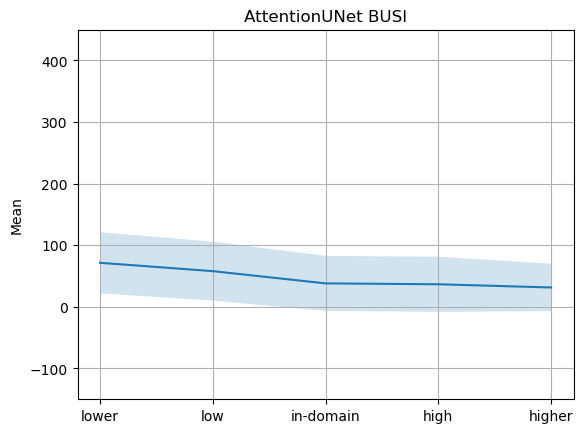

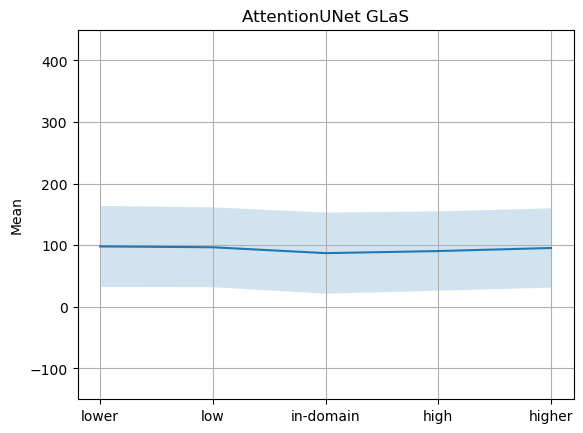

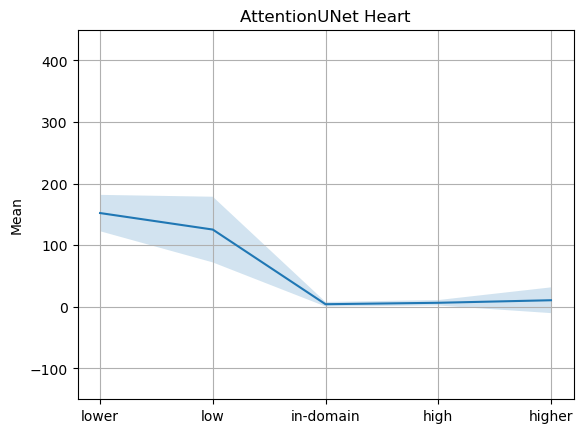

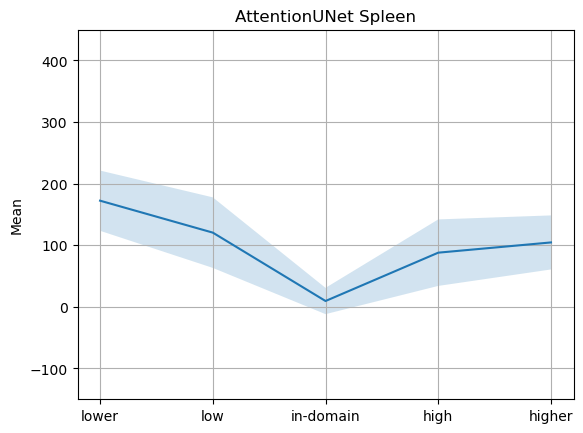

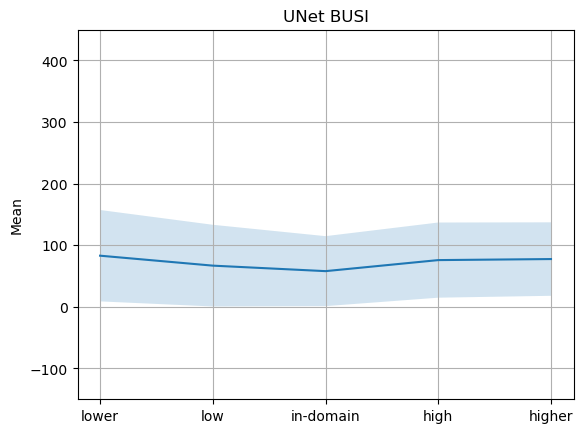

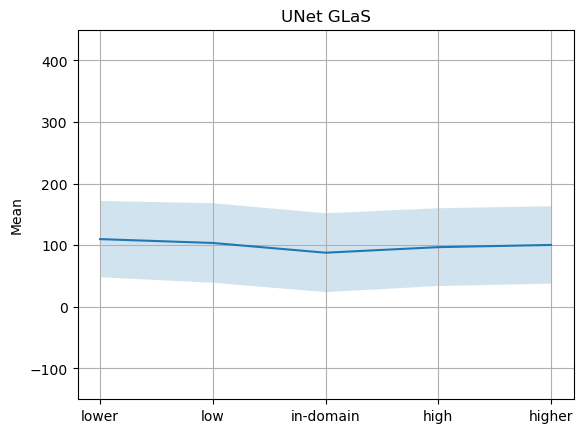

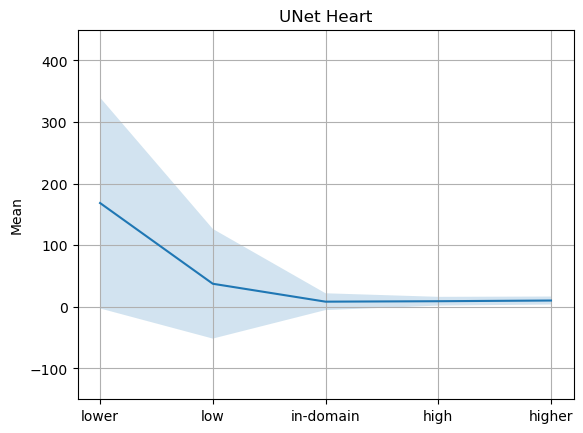

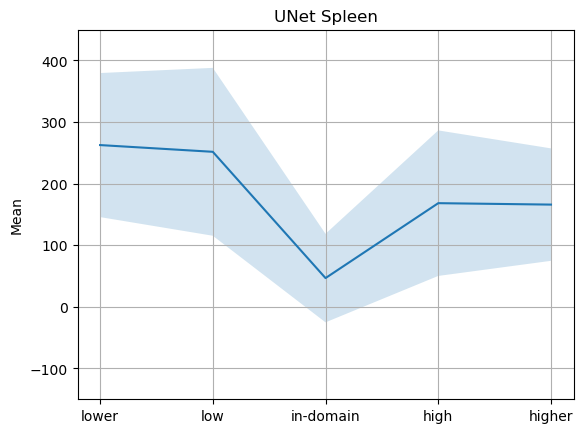

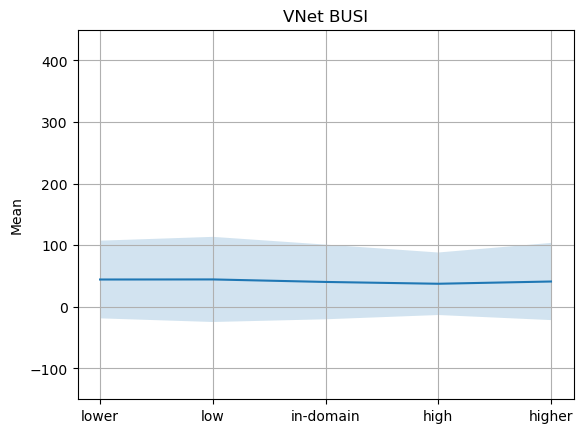

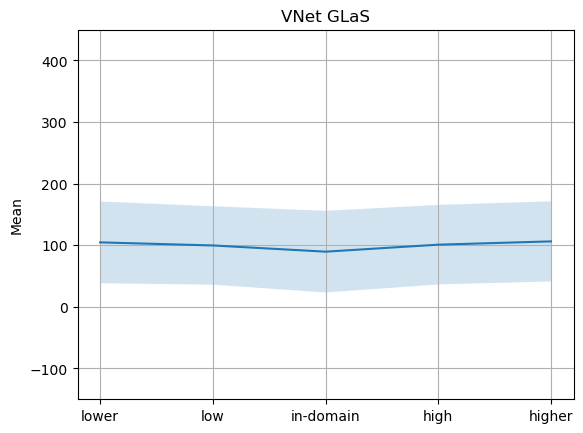

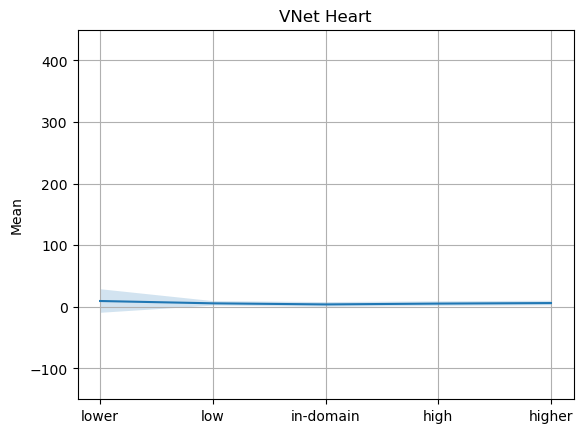

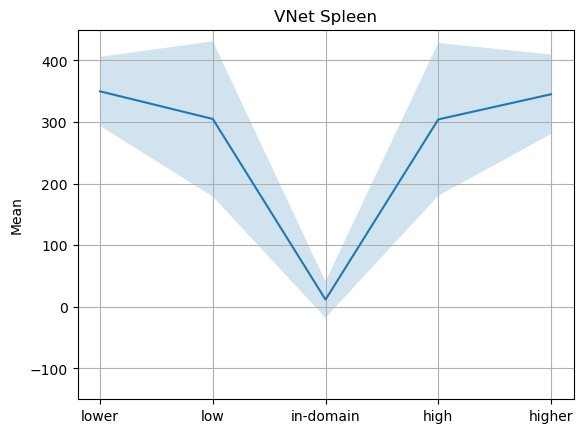

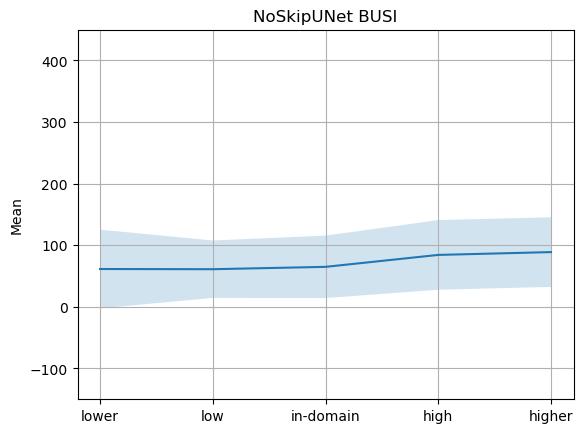

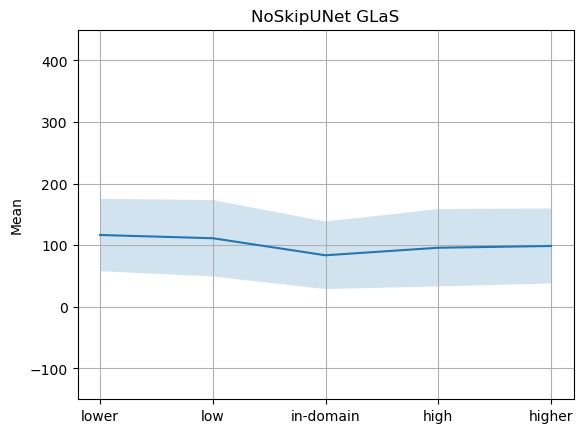

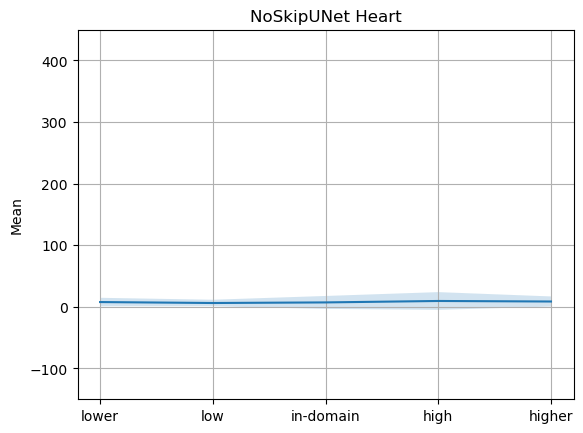

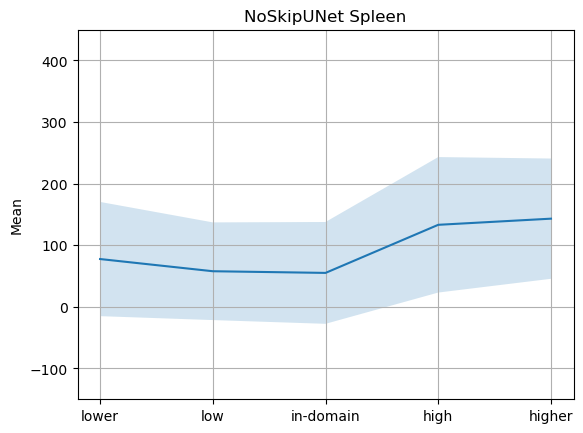

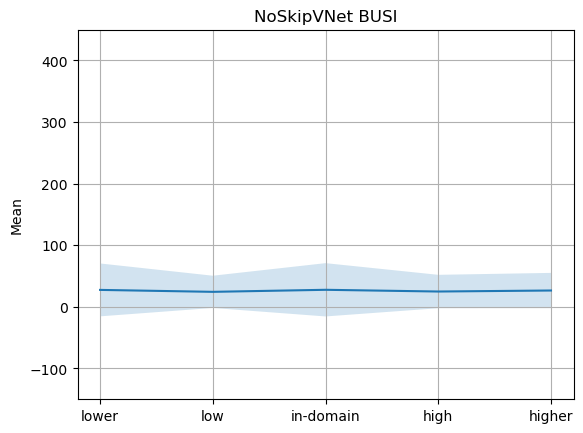

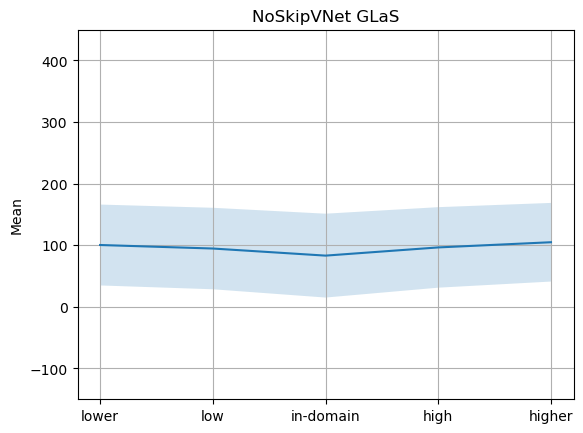

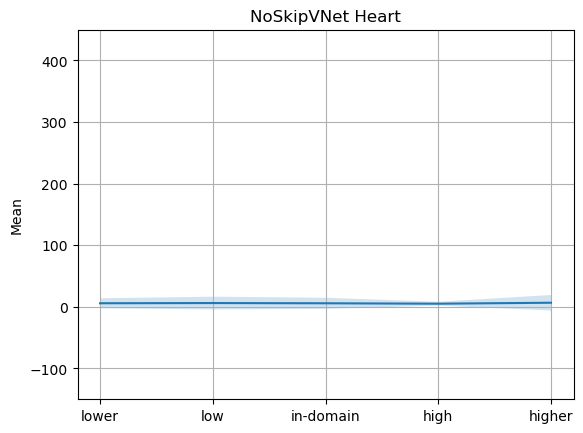

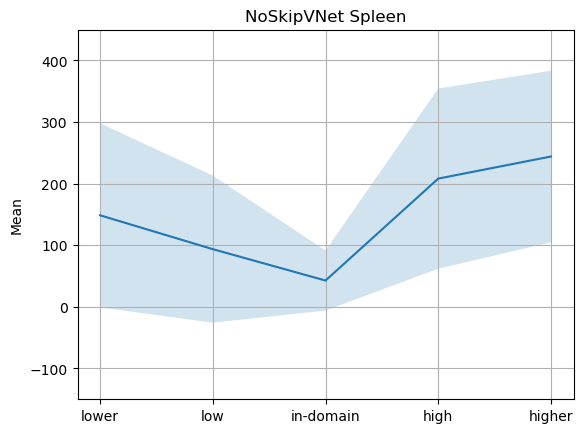

In [5]:
for model_type in model_list:
    for image_type in anatomy_list:
        results_by_image = {}
        mean_line = []
        std_lower = []
        std_higher = []
        for variant in variant_list:
            mean_line.append(hd_mean_data[variant][model_type][image_type])
            std_lower.append(hd_mean_data[variant][model_type][image_type] - hd_std_data[variant][model_type][image_type])
            std_higher.append(hd_mean_data[variant][model_type][image_type] + hd_std_data[variant][model_type][image_type])

        results_by_image["Mean"] = mean_line
        results_by_image["Lower"] = std_lower
        results_by_image["Higher"] = std_higher

        plt.figure()
        df = pd.DataFrame.from_dict(results_by_image, columns=variant_list, orient='index')
        ax = sns.lineplot(data=df.T, x=df.T.index, y="Mean", palette='flare')
        ax.fill_between(df.T.index, df.T.Lower, df.T.Higher, alpha=0.2)
        plt.title(model_type + " " + image_type)
        plt.grid(True)
        plt.ylim([-150, 450])